In [305]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

import seaborn as sn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [306]:
data = pd.read_csv("data/integrated.csv")

label = "playoff"
df = data
df['confID'].value_counts()

bins = 11  # Number of bins
# Use the cut function to perform binning
df['height'] = pd.cut(df['height'], bins=bins)
df['weight'] = pd.cut(df['weight'], bins=bins)

df.columns

Index(['year', 'tmID', 'W_team_post', 'L_team_post', 'franchID', 'confID',
       'rank', 'playoff', 'firstRound', 'semis', 'finals', 'name', 'o_fgm',
       'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_oreb', 'o_dreb',
       'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm',
       'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_oreb', 'd_dreb',
       'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts',
       'won_team', 'lost_team', 'GP', 'homeW', 'homeL', 'awayW', 'awayL',
       'confW', 'confL', 'min', 'attend', 'arena', 'coachID', 'stint',
       'won_coach', 'lost_coach', 'post_wins', 'post_losses', 'round',
       'series', 'tmIDWinner', 'tmIDLoser', 'W_series', 'L_series', 'playerID',
       'CBE_Sum', 'pos', 'height', 'weight', 'college', 'birthDate',
       'award_player', 'award_coach'],
      dtype='object')

In [307]:
df.shape

(2019, 75)

In [308]:
mapping = {'L': 'Y',
           'W': 'Y'}

df['semis'] = df['semis'].map(mapping)
df['finals'] = df['finals'].map(mapping)
df['firstRound'] = df['firstRound'].map(mapping)


In [309]:
features = df.columns

X = df[features]
df = X

In [310]:
le = LabelEncoder()
y = le.fit_transform(df['playoff'])
for x in df.columns:
    df[x] = le.fit_transform(df[x])

In [311]:
available_columns = list(features)
available_columns.remove("playoff")
key_predictors = []
features_values = pd.DataFrame(df, columns=available_columns)
target_values = df["playoff"].values
chi2_results = chi2(features_values, target_values)
best_chi2_cols = SelectKBest(chi2, k=25)



corr_matrix = df.corr()
# fig = plt.figure(figsize=(36,36), dpi = 480)
# sn.heatmap(df.corr(), annot = True, fmt = '.2f')
# plt.show()


key_features = ["playoff", "year", 'confID']

best_chi2_cols.fit(features_values, target_values)

best_chi2_features = features_values.columns[best_chi2_cols.get_support()]
for k in (best_chi2_features):
    print(df[['playoff', k]].corr().iloc[0, 1])
    print(k)
    key_predictors.append(k)

for ft in key_features:
    if ft not in key_predictors:
        key_predictors.append(ft)
df = df[key_predictors]

key_predictors = list(df.columns)


-0.3426254975274889
rank
0.2401484989210538
o_fgm
0.1618610374259175
o_fga
0.11625140553363945
o_ftm
0.25756504994049095
o_oreb
0.2913000279496466
o_dreb
0.2913716705125093
o_reb
0.3078426470013381
o_asts
0.13891945878681275
o_blk
0.2119936767855779
o_pts
0.18450103433442094
d_3pa
-0.192861675554947
d_oreb
0.3965038897286824
won_team
-0.39099585024058453
lost_team
0.38572316874082807
awayW
-0.3785212561844179
awayL
0.37431086877458675
confW
-0.37035154459133446
confL
0.27787242126404954
attend
0.34716335566120887
won_coach
0.39046624595686996
post_wins
-0.43456867809744654
tmIDWinner
-0.3495308456801436
tmIDLoser
0.07396182212493925
CBE_Sum
-0.08532616534565995
birthDate


In [312]:
# high_correlation_pairs = []
# for i in range(len(corr_matrix.columns)):
#     for j in range(i):
#         if abs(corr_matrix.iloc[i, j]) > 0.91:
#             feature1 = corr_matrix.columns[i]
#             feature2 = corr_matrix.columns[j]
#             correlation_value = corr_matrix.iloc[i, j]
#             high_correlation_pairs.append((feature1, feature2, correlation_value))

# # Print the high-correlation pairs
# for feature1, feature2, correlation_value in high_correlation_pairs:
#     print(f"Features: {feature1} and {feature2} have a correlation of {correlation_value:.2f}")
#     if feature2 in key_predictors:
#         key_predictors.remove(feature2)

# df = df[key_predictors]
# print(key_predictors)


In [313]:
print(df.columns)

Index(['rank', 'o_fgm', 'o_fga', 'o_ftm', 'o_oreb', 'o_dreb', 'o_reb',
       'o_asts', 'o_blk', 'o_pts', 'd_3pa', 'd_oreb', 'won_team', 'lost_team',
       'awayW', 'awayL', 'confW', 'confL', 'attend', 'won_coach', 'post_wins',
       'tmIDWinner', 'tmIDLoser', 'CBE_Sum', 'birthDate', 'playoff', 'year',
       'confID'],
      dtype='object')


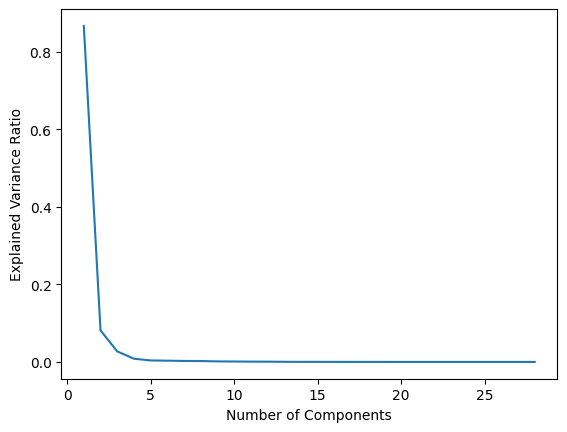

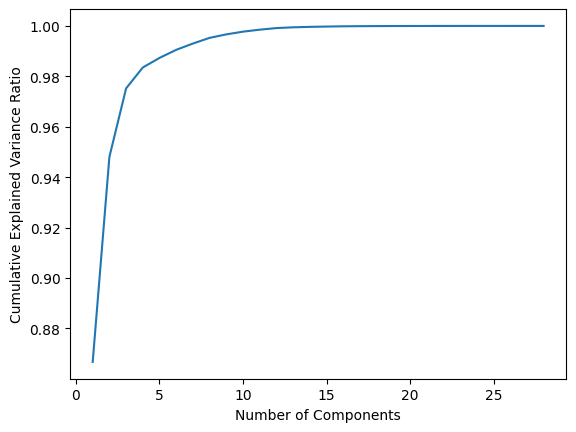

In [314]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(df)  # X is your data
explained_var_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

cum_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


In [315]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


n_components = 10
columns_to_keep = ['year', 'confID', label]
df_to_keep = df[columns_to_keep]

df.drop(columns_to_keep, axis=1, inplace=True)

custom_column_names = [f'PC{i + 1}' for i in range(n_components)]  # Create custom column names

#Assuming 'X' is your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=n_components)  # Choose the number of components you want
X_pca = pca.fit_transform(X_scaled)

df_result = pd.DataFrame(data=X_pca, columns=custom_column_names)
df = pd.concat([df_result, df_to_keep], axis=1)

print(df)

# X_pca now contains the reduced-dimensional representation of your data


/var/folders/97/nk3s9sxx36x77jsk9m_r0xmc0000gn/T/ipykernel_61648/2230795299.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns_to_keep, axis=1, inplace=True)


           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     3.254473  4.762528 -0.236664 -1.703161  1.275744  2.023468  0.897242   
1    -2.833388  0.381777  1.892435 -2.401356 -1.555491  0.208972 -0.938924   
2    -2.833388  0.381777  1.892435 -2.401356 -1.555491  0.208972 -0.938924   
3     0.915636  0.525103  0.527031 -2.115545 -0.606888  0.588643 -0.597764   
4    -4.147620  0.938403  0.528265 -1.830420 -0.096622 -0.163796 -1.033639   
...        ...       ...       ...       ...       ...       ...       ...   
2014  0.013173  3.066962  1.145154  1.932062 -0.260824  0.044633  1.254724   
2015  2.517283  3.039597 -2.357999 -0.013119 -1.270001  0.396977 -0.106399   
2016  0.258162  3.371767  1.381452  1.685426 -0.590329  0.135818  0.492509   
2017  0.014919  3.055305  1.147803  1.905344 -0.255726  0.046729  1.256051   
2018  2.600401  3.012345 -2.158706  1.337210 -1.874613  0.100931  0.077825   

           PC8       PC9      PC10  year  confID  playoff  
0  

In [316]:
print(df.columns)

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'year', 'confID', 'playoff'],
      dtype='object')


In [317]:
# corr_matrix = df.corr()
# fig = plt.figure(figsize=(30,30), dpi = 480)
# sn.heatmap(df.corr(), annot = True, fmt = '.2f')
# plt.show()

In [318]:
from sklearn.svm import SVC

clf = DecisionTreeClassifier()
mlp = MLPClassifier()
svm  = SVC(probability=True)

In [319]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

def confusion_matrix_plot(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt='g',
        xticklabels=['No', 'Yes'],
        yticklabels=['No', 'Yes']
    )
    plt.ylabel("Prediction", fontsize=13)
    plt.xlabel("Actual", fontsize=13)
    plt.title("Confusion Matrix", fontsize=14)
    plt.show()
    
def roc_curve_plot(y_test, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    

def model_score(y_test, y_pred, y_prob):
    confusion_matrix_plot(y_test, y_pred)
    roc_curve_plot(y_test, y_prob)
    
    print(f"AUC: {round(roc_auc_score(y_test, y_prob) * 100, 2)}%")
    print(f"Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print(f"Precision: {round(precision_score(y_test, y_pred) * 100, 2)}%")
    print(f"Recall: {round(recall_score(y_test, y_pred) * 100, 2)}%")
    print(f"F1: {round(f1_score(y_test, y_pred) * 100, 2)}%")

[0, 1, 2, 3, 4, 5, 6, 7, 8]


/var/folders/97/nk3s9sxx36x77jsk9m_r0xmc0000gn/T/ipykernel_61648/3929618937.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(['confID'], axis=1, inplace=True)
/var/folders/97/nk3s9sxx36x77jsk9m_r0xmc0000gn/T/ipykernel_61648/3929618937.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(['confID'], axis=1, inplace=True)
/var/folders/97/nk3s9sxx36x77jsk9m_r0xmc0000gn/T/ipykernel_61648/3929618937.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

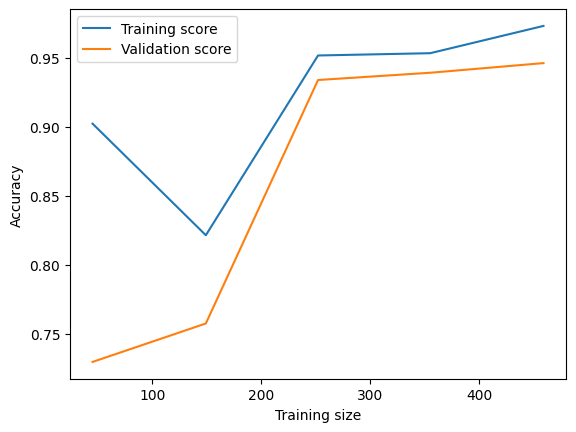

/var/folders/97/nk3s9sxx36x77jsk9m_r0xmc0000gn/T/ipykernel_61648/3929618937.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sampleWeight'] = data['year'].apply(lambda year_x: 2 ** (year - year_x - 1) if year > year_x else 1)
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural

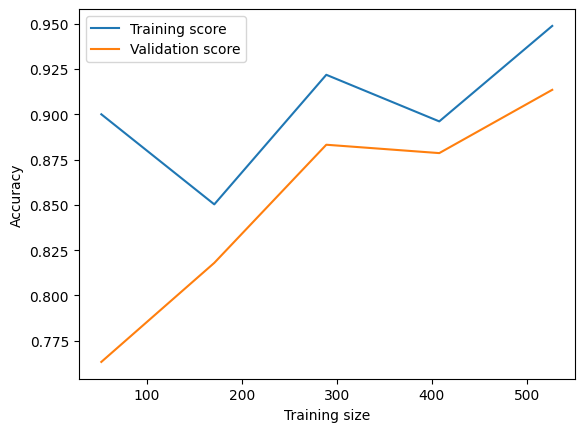

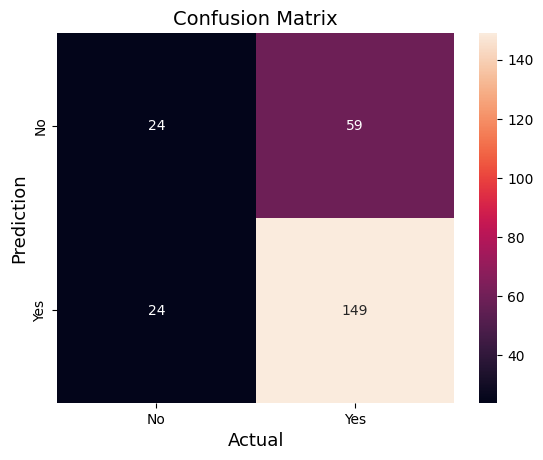

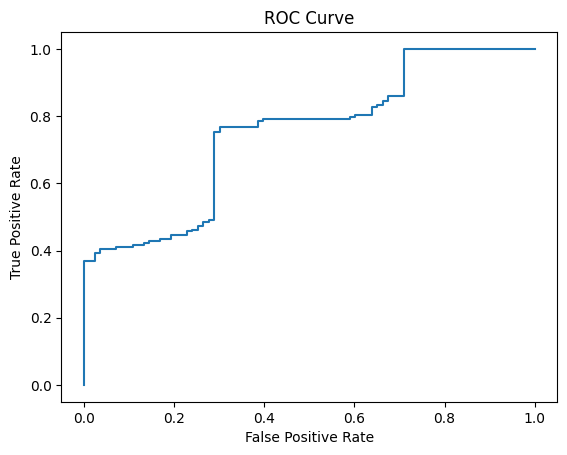

AUC: 74.87%
Accuracy: 67.58%
Precision: 71.63%
Recall: 86.13%
F1: 78.22%


([8], [0.67578125])

In [320]:
from sklearn.model_selection import learning_curve


def split_data(df):
    return df[df['confID'] == 0], df[df['confID'] == 1]

def train_model_validation(year, model, data, label, param_grid):
    data['sampleWeight'] = data['year'].apply(lambda year_x: 2 ** (year - year_x - 1) if year > year_x else 1)
    train_data = data[data["year"] < year]
    test_data = data[data["year"] == year]

    X_train, X_val, y_train, y_val = train_test_split(train_data.drop([label], axis=1),
                                                      train_data[label], test_size=0.3)

    X_test, y_test = test_data.drop([label, 'sampleWeight'], axis=1), test_data[label]
    sample_weight = X_train['sampleWeight']
    #model.fit(X_train.drop(['sampleWeight'], axis=1), y_train, sample_weight=sample_weight)
    #grid_search = GridSearchCV(model, param_grid, cv=None)
    #grid_search.fit(X_val, y_val)

    sample_weight = train_data["sampleWeight"]
    #model.set_params(**param_grid)

    #print(grid_search.best_params_)

    model.fit(train_data.drop([label, "sampleWeight"], axis=1), train_data[label])

    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=None)

    plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
    plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
    plt.xlabel('Training size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    return y_test, y_pred, y_prob


#def train_model(year, model, data, label):
#    data['sampleWeight'] = data['year'].apply(lambda year_x: 2 ** (year - year_x - 1) if year > year_x else 1)
#    train_data = data[data["year"] < year]
#    test_data = data[data["year"] == year]
#
#    X_train, X_test = train_data.drop([label, 'sampleWeight'], axis=1), test_data.drop([label, 'sampleWeight'], axis=1)
#    y_train, y_test = train_data[label], test_data[label]
#    sample_weight = train_data['sampleWeight']
#
#    model.fit(X_train, y_train, sample_weight=sample_weight)
#    y_pred = model.predict(X_test)
#    y_prob = model.predict_proba(X_test)
#
#    return y_test, y_pred, y_prob


def train_evaluate_decision_tree_graph(model, data):
    accuracy_scores = []
    years_tested = []

    data = data.sort_values(by="year")
    data1, data2 = df[df['confID'] == 0], df[df['confID'] == 1]

    data1.drop(['confID'], axis=1, inplace=True)
    data2.drop(['confID'], axis=1, inplace=True)
    years = sorted(data["year"].unique())

    param_grid = {
        'kernel': 'linear',        
        }

    
    year = 8

    print(years)

    y_test1, y_pred1, y_prob1 = train_model_validation(year, model, data1, label, param_grid)
    y_test2, y_pred2, y_prob2 = train_model_validation(year, model, data2, label, param_grid)

    y_test = np.concatenate((y_test1, y_test2))
    y_pred = np.concatenate((y_pred1, y_pred2))
    y_prob = np.concatenate((y_prob1[:, 1], y_prob2[:, 1]))

    model_score(y_test, y_pred, y_prob)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    years_tested.append(year)

    return years_tested, accuracy_scores


train_evaluate_decision_tree_graph(mlp, df)

 Model Score